### Emircan Aky√ºz
Bu √ßalƒ±≈üma Emircan Aky√ºz tarafƒ±ndan yapƒ±lmƒ±≈ütƒ±r. √áalƒ±≈üma iki b√∂l√ºmden olu≈ümaktadƒ±r: **veri analizi ve √∂n i≈üleme** ile **model geli≈ütirilmesi.**

## 1-) Veri Analizi ve √ñn ƒ∞≈üleme

In [835]:
# K√ºt√ºphaneleri import edelim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [740]:
df = pd.read_excel("data.xlsx")
df.head() #.head() veri setimizin ilk 5 s√ºtununu bize g√∂sterir

company_code  document_number  \
0          1504       4200004825   
1          1504       4200004824   
2          1504       4200004826   
3          1504       4200004828   
4          1504       4200004827   

                                         description payment_type    amount  \
0  EF7789421YORUMAJANSPAZARLAMAITHALATVET-FATURAB...            H  400000.0   
1                        SEBNEMBATI-GUROLBATIODAKEGI            H   21000.0   
2                           ANADOLUISLETMELERITI-KEN            H   72000.0   
3                  FUARCILIKLTD.STI.-FUARCILIKODEMET            H   24000.0   
4  INT-HVL-BA≈ûAK≈ûEHƒ∞RCHODEME-KARSILIKSIZ-MEDYA9IL...            H  158000.0   

  currency_code transaction_type  seller_number  customer_number  main_account  
0           TRY             NEFT            NaN     1.200110e+09           NaN  
1           TRY             NMSC            NaN     1.200120e+09           NaN  
2           TRY             NMSC            NaN     1.200118e+09           NaN  
3           TRY             NMSC            NaN     1.200100e+09           NaN  
4           TRY             NTRF            NaN     1.200106e+09           NaN

√ñn i≈üleme adƒ±mlarƒ±na ba≈ülamadan √∂nce temel analiz yapalƒ±m. S√ºtunlarƒ±n bizlere tahminsel olarak ne √ßaƒürƒ±≈ütƒ±rdƒ±ƒüƒ±na g√∂z atalƒ±m. Buradaki bilgilerin tahminsel olduƒüunu tekrar belirtelim.
- **company_code:** ≈ûirketlere atanan bir ID adresi olarak d√º≈ü√ºnebiliriz.
- **document_number:** ≈ûirketlerin ger√ßekle≈ütirdiƒüi i≈ülem sonrasƒ±nda olu≈üturulan belgenin numarasƒ±.
- **description:** Ger√ßekle≈ütirilen i≈ülem ile ilgili kƒ±sa bir a√ßƒ±klama.
- **payment_type:** Bu s√ºtun √∂deme t√ºr√ºn√º ifade ediyor. S: Slip benzeri ya da kredi kartƒ± ile ilgili bir kƒ±saltma olabilir. H: Nakitle ilgili bir kƒ±saltma olabilir.
- **amount:** Ger√ßekle≈ütirilen i≈ülem miktarƒ±.
- **currency_code:** ƒ∞≈ülemin hangi para biriminde ger√ßekle≈ütirildiƒüini belirtir. 
- **transaction_type:** Bankacƒ±lƒ±k sekt√∂r√ºndeki mesaj formatlarƒ±nƒ± i√ßeriyor. √ñrnek: NTAX, vergi √∂demelerini ifade etmektedir. 
- **seller_number:** √áƒ±ktƒ± sƒ±nƒ±fƒ±
- **customer_number:** √áƒ±ktƒ± sƒ±nƒ±fƒ±
- **main_account:** √áƒ±ktƒ± sƒ±nƒ±fƒ±

Bu √ßalƒ±≈ümada √ßƒ±ktƒ±larƒ±mƒ±z seller_number, customer_number ve main_account olarak verilmi≈ü. Bu √ßƒ±ktƒ±lar veri setinde s√ºtunlar olarak ifade edilmi≈ü ve s√ºtun i√ßeriklerine ise satƒ±≈ü numarasƒ±nƒ± ve yahut m√º≈üteri numarasƒ±nƒ± temsil eden n√ºmerik deƒüerler girilmi≈ü. **Daha detaylandƒ±racak olursak √ßƒ±ktƒ± sƒ±nƒ±flarƒ± ≈üuna benzer bir yapƒ±ya sahip olmu≈ü oluyor.**

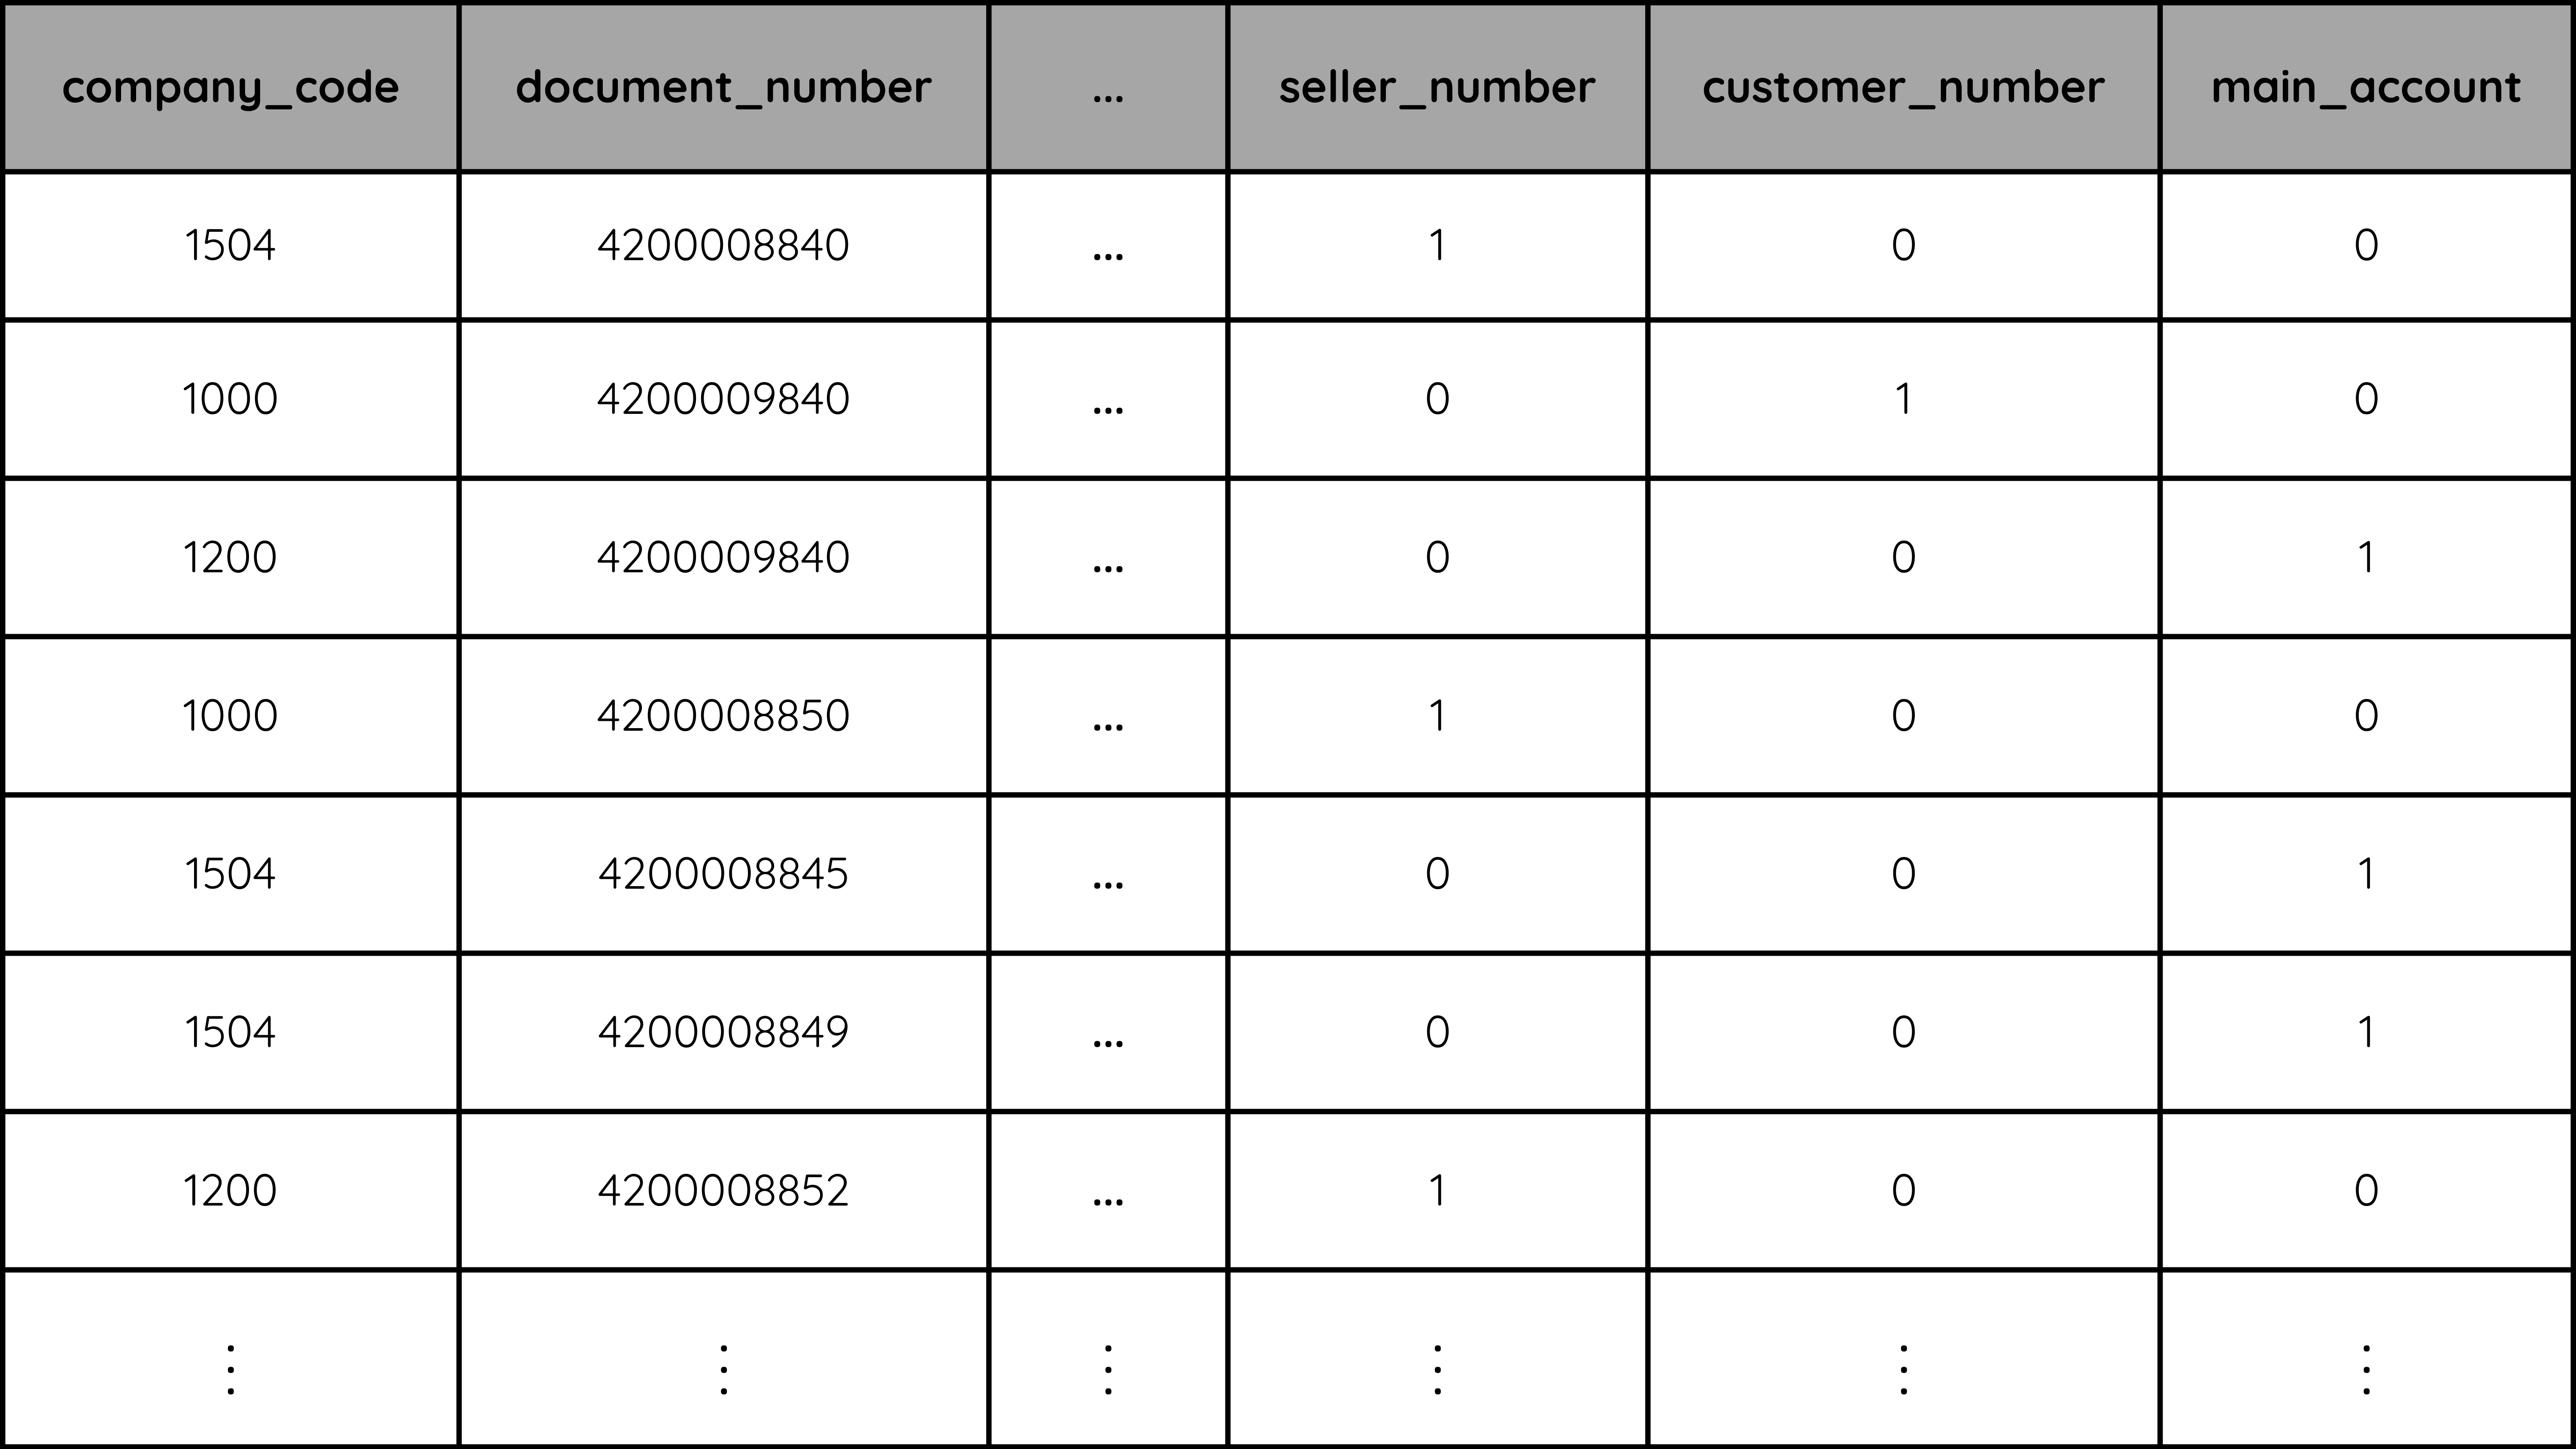

Bu s√ºtunlarda bulunan deƒüerler eksik veri olarak da yorumlanmaya m√ºsait gibi duruyor fakat bu s√ºtunlarda ≈ü√∂yle bir fark var: s√ºtunlardaki deƒüerler tekrar eden ifadeler barƒ±ndƒ±rdƒ±ƒüƒ±ndan √∂t√ºr√º √ße≈üitli numaralandƒ±rƒ±lma y√∂ntemleri kullanƒ±larak yazƒ±lmƒ±≈üa benziyor. √ñrnek vermek gerekirse "1950005053" ifadesinde 195 belli bir anlam ta≈üƒ±yan deƒüer olabilir (vergi √ºcretlendirmesi vb). Dolayƒ±sƒ±yla bu eksik verileri s√ºtunun ortalamasƒ± ya da medyanƒ± gibi deƒüerleri kullanarak dolduramayƒ±z √ß√ºnk√º anlamlƒ± bir sonu√ß √ßƒ±kmayacaktƒ±r. Dolayƒ±sƒ±yla bu s√ºtunlarda eksik veri analizi yapmayacaƒüƒ±z ve dodurma i≈ülemi ger√ßekle≈ütirmeyeceƒüiz onun yerine bu kƒ±smƒ± g√∂rseldekine benzer bir yapƒ±ya √ßevirmemiz gerekiyor. Bunun i√ßin verisetine output isminde yeni bir s√ºtun ekleyeceƒüiz ve s√ºtunlarƒ± 0, 1 ve 2 olarak dolduracaƒüƒ±z. **Bu a≈üamada 0: seller_number sƒ±nƒ±fƒ±nƒ±, 1:customer_number sƒ±nƒ±fƒ±nƒ± ve 2:main_account sƒ±nƒ±fƒ±nƒ± temsil edecek.**

In [743]:
# output s√ºtunu olu≈üturma
df["output"] = 0 # output adƒ±nda yeni bir s√ºtun olu≈üturuyoruz ve t√ºm deƒüerleri 0 ile dolduruyoruz.

In [744]:
# Bu i≈ülemi yapmak i√ßin bir fonksiyon olu≈üturalƒ±m.
# 0: seller_number
# 1: customer_number
# 2: main_account
def output_values(df, target_column, output_column, output_value):
    # Eƒüer output_column s√ºtunu yoksa olu≈ütur
    if output_column not in df.columns:
        df[output_column] = None
    
    # S√ºtunu for ile dola≈ü
    for index, value in enumerate(df[target_column]):
        if pd.notna(value):
            df.loc[index, output_column] = output_value # ilgili satƒ±r bo≈ü deƒüil ise √ßƒ±ktƒ± deƒüerini ata
        else:
            continue # ilgili satƒ±r bo≈ü ise diƒüer satƒ±ra ge√ß

In [745]:
# √∂nce customer_number s√ºtununu sonra ise main_account s√ºtununu ilgili sƒ±nƒ±f deƒüerleri ile dolduruyoruz. 
output_values(df, "customer_number", "output", 1)
output_values(df, "main_account", "output", 2)

Bu deƒüi≈üiklikleri yaptƒ±ktan sonra veri setimize bir kez daha bakacak olursak output s√ºtunundaki √ßƒ±ktƒ±larƒ±mƒ±zƒ±n, √ßƒ±ktƒ± sƒ±nƒ±flarƒ± (seller_number, customer_number, main_account) baz alƒ±narak 0,1,2 olarak sƒ±nƒ±flandƒ±rƒ±ldƒ±ƒüƒ±nƒ± g√∂rebiliriz.

In [747]:
df.head(50)

company_code  document_number  \
0           1504       4200004825   
1           1504       4200004824   
2           1504       4200004826   
3           1504       4200004828   
4           1504       4200004827   
5           1504       4200004830   
6           1504       4200004829   
7           1504       4200004823   
8           1504       4200004831   
9           1504       4200004782   
10          1504       4200004783   
11          1504       4200004784   
12          1504       4200004792   
13          1504       4200004794   
14          1504       4200004795   
15          1504       4200004820   
16          1504       4200004781   
17          1504       4200004819   
18          1504       4200004786   
19          1504       4200004791   
20          1504       4200004793   
21          1504       4200004818   
22          1504       4200004796   
23          1504       4200004797   
24          1504       4200004798   
25          1504       4200004799   
26          1504       4200004800   
27          1504       4200004810   
28          1504       4200004811   
29          1504       4200004812   
30          1504       4200004813   
31          1504       4200004814   
32          1504       4200004815   
33          1504       4200004816   
34          1504       4200004821   
35          1504       4200004822   
36          1504       4200004785   
37          1504       4200004787   
38          1504       4200004788   
39          1504       4200004789   
40          1504       4200004790   
41          1504       4200004817   
42          1501       4200000908   
43          1000       4200008809   
44          1000       4200008813   
45          1000       4200008817   
46          1000       4200008840   
47          1000       4200008841   
48          1000       4200008818   
49          1000       4200008777   

                                          description payment_type  \
0   EF7789421YORUMAJANSPAZARLAMAITHALATVET-FATURAB...            H   
1                         SEBNEMBATI-GUROLBATIODAKEGI            H   
2                            ANADOLUISLETMELERITI-KEN            H   
3                   FUARCILIKLTD.STI.-FUARCILIKODEMET            H   
4   INT-HVL-BA≈ûAK≈ûEHƒ∞RCHODEME-KARSILIKSIZ-MEDYA9IL...            H   
5          CEPSUBE-HVL-SEAKTOPRAPORODEMESI-SELINKILIC            H   
6   016716297369ISTANBULAIFAHOLDINGANONIMSIRKETITC...            S   
7               THEHESABAHAVALEKOMISYONU-KOMTCKN:VKN:            S   
8               10/09/2024CEKTAHSILATIUCRETITCKN:VKN:            S   
9                   4310NOVARALASYONVELLIK-OBA2024000            H   
10                    84229NOVARMESTCERV-OBA202400000            H   
11                        260NOVAZERHIZM.TI-OBA202400            H   
12                           54OZDILEK.SAN-OZDILEKAVM            H   
13                    7AYYAPIEND.VETIC.A.S.-TCKN:VKN:            H   
14             17YUNLUSAN.VETIC.A.S.-TEDARIKODEMETCKN            H   
15                     MEDYAPLANLAMAREKLAMORGANIZASY-            H   
16                                  65-NOVARTI-OBA202            H   
17                        9520-ATARSAGLIKHIZMETLERITI            H   
18               AIFA2AIFAHOLDINGANONIMSIRKETITCKN:VK            H   
19               AIFA2AIFAHOLDINGANONIMSIRKETITCKN:VK            H   
20    INT-HVL-CARIHESABAMAHSUBEN-REKLAMTANITIMTTCKN:V            H   
21                        TICARIODEMEMOBILTEMIZLIKACI            H   
22                        0ISTANBULATIKEOZSAHINTCKN::            S   
23                        7ISTANBULAYKUTSAHINTCKN::79            S   
24                       62ISTANBULAYSENURCIHANTCKN::            S   
25                        0ISTANBULBURCUCANBAZTCKN::9            S   
26                         ISTANBULFATIHARSLANTCKN::8            S   
27                         ISTANBULSELCUKYAPTCKN::937            S   
28                      9ISTANBULSELINKILICAKTOPTCKN:            S   
29           

In [748]:
# Veri setimizin genel durumuna bakalƒ±m
df.info() #.info() veri setimiz hakkƒ±nda temel bilgileri tablo olarak sunar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company_code      200 non-null    int64  
 1   document_number   200 non-null    int64  
 2   description       200 non-null    object 
 3   payment_type      200 non-null    object 
 4   amount            200 non-null    float64
 5   currency_code     200 non-null    object 
 6   transaction_type  200 non-null    object 
 7   seller_number     109 non-null    float64
 8   customer_number   58 non-null     float64
 9   main_account      33 non-null     float64
 10  output            200 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 17.3+ KB


Veri setimizi pandas kullanarak i√ßeri aktardƒ±ƒüƒ±mƒ±z i√ßin t√ºr√º Data Frame olarak kar≈üƒ±mƒ±za √ßƒ±kƒ±yor. 11 (normalde 10 s√ºtun output sƒ±nƒ±fƒ± ile 11) s√ºtun 200 satƒ±r olan veri setimizin d√∂rder s√ºtunu object t√ºr√ºnde iken diƒüer s√ºtunlar numeric bir yapƒ±dadƒ±r. seller_number, customer_number ve main_account s√ºtunlarƒ±ndaki null olmayan deƒüerlerin toplamƒ± 200 yapmaktadƒ±r. Daha detaylƒ± a√ßƒ±klayacak olursak veri setimiz √ße≈üitli finansal i≈ülemlerden olu≈ümakta ve bu i≈ülemler seller_number (0), customer_number (1) ve main_account (2) olarak sƒ±nƒ±flandƒ±rƒ±lmƒ±≈ü diyebiliriz. Yukarƒ±daki tabloda g√∂rebileceƒüimiz √ºzere veri setimiz sadece n√ºmerik t√ºrlerden olu≈ümuyor. Object olarak adlandƒ±rƒ±lmƒ±≈ü olan verilerin String deƒüerler olduƒüunu biliyoruz dolayƒ±sƒ±yla bu deƒüerleri sayƒ±sal bir formata √ßevirmeliyiz aksi takdirde model eƒüitimi s√ºrecinde hatalar ile kar≈üƒ±la≈üabiliriz. Makine √∂ƒürenmesi (ML) algoritmalarƒ±nƒ±n kategorik verilerde hata vermesinin nedeni, bu algoritmalarƒ±n i√ß yapƒ±sƒ±ndaki sayƒ±sal hesaplamalara dayanmaktadƒ±r. String veya kategorik veriler, algoritmalarƒ±n matematiksel i≈ülemler yapmasƒ±nƒ± engelleyeceƒüinden hatalara neden olur. 

In [750]:
# Veri setimizdeki e≈üsiz (unique) deƒüerlere g√∂z atalƒ±m.
company_code_unique = df.company_code.unique() #.unique() fonksiyonu bizlere o s√ºtun i√ßerisinde ka√ß adet e≈üsiz deƒüer olduƒüunu g√∂sermektedir.
payment_type_unique = df.payment_type.unique()
transaction_type_unique = df.transaction_type.unique()

In [751]:
print(f" company_code unique deƒüerleri: {company_code_unique}\n payment_type unique deƒüerleri: {payment_type_unique}\n transaction_type unique deƒüerleri: {transaction_type_unique}")

 company_code unique deƒüerleri: [1504 1501 1000 1200 1512]
 payment_type unique deƒüerleri: ['H' 'S']
 transaction_type unique deƒüerleri: ['NEFT' 'NMSC' 'NTRF' 'NCHG' 'NCHK' 'NTDP' 'NVRM' 'NTAX']


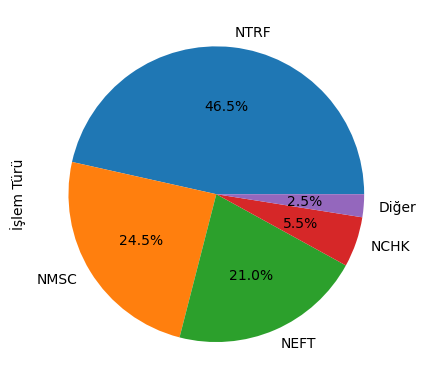

In [752]:
# Veri setimizi g√∂rseller ile temsil etmek hangi √∂zelliklerin (features) daha baskƒ±n olduƒüunu bizlere daha okunabilir sunmaktadƒ±r.
counts = df.transaction_type.value_counts()
counts['Diƒüer'] = counts[counts < 5].sum()  # 5'ten k√º√ß√ºk dilimleri toplayalƒ±m
counts = counts[counts >= 5]  # Sadece b√ºy√ºk dilimleri bƒ±rakalƒ±m
counts.plot(
    kind="pie", 
    autopct="%.1f%%"
)
plt.ylabel("ƒ∞≈ülem T√ºr√º");
plt.show()

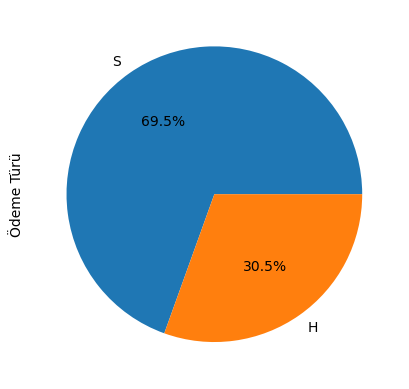

In [753]:
df.payment_type.value_counts().plot(kind= "pie", autopct = "%.1f%%")
plt.ylabel("√ñdeme T√ºr√º");

### Eksik Veri Analizi

In [755]:
df.isnull() #.isnull() fonksiyonu tablodaki null kƒ±sƒ±mlara "True" null olmayan kƒ±sƒ±mlara "False" yazar 

company_code  document_number  description  payment_type  amount  \
0           False            False        False         False   False   
1           False            False        False         False   False   
2           False            False        False         False   False   
3           False            False        False         False   False   
4           False            False        False         False   False   
..            ...              ...          ...           ...     ...   
195         False            False        False         False   False   
196         False            False        False         False   False   
197         False            False        False         False   False   
198         False            False        False         False   False   
199         False            False        False         False   False   

     currency_code  transaction_type  seller_number  customer_number  \
0            False             False           True            False   
1            False             False           True            False   
2            False             False           True            False   
3            False             False           True            False   
4            False             False           True            False   
..             ...               ...            ...              ...   
195          False             False          False             True   
196          False             False          False             True   
197          False             False          False             True   
198          False             False          False             True   
199          False             False          False             True   

     main_account  output  
0            True   False  
1            True   False  
2            True   False  
3            True   False  
4            True   False  
..            ...     ...  
195          True   False  
196          True   False  
197          True   False  
198          True   False  
199          True   False  

[200 rows x 11 columns]

In [756]:
df.isnull().sum() #.isnull() fonksiyonunu .sum() ile kullandƒ±ƒüƒ±mƒ±zda ise t√ºm s√ºtunlarda false deƒüerleri toplanƒ±r ve tablo olarak sunulur 

company_code          0
document_number       0
description           0
payment_type          0
amount                0
currency_code         0
transaction_type      0
seller_number        91
customer_number     142
main_account        167
output                0
dtype: int64

√áƒ±ktƒ± olarak se√ßeceƒüimiz sƒ±nƒ±flar haricinde eksik bir deƒüer olmadƒ±ƒüƒ±nƒ± g√∂r√ºyoruz. Eƒüer ki veri setimizde eksik deƒüerler bulunan s√ºtunlar olsaydƒ± eksik deƒüerler yerine ilgili s√ºtunun ortalamasƒ±nƒ± ya da medyanƒ±nƒ± yazacaktƒ±k (Eƒüer ki veri setimiz gaussian bir daƒüƒ±lƒ±ma sahipse ortalamayƒ± veya medyanƒ± yazabiliriz fakat veri setimiz √ßarpƒ±k bir daƒüƒ±lƒ±ma sahipse o zaman ortalamayƒ± yazamayƒ±z √ß√ºnk√º ortalama deƒüeri anormal bir deƒüere sahip olabilir. Dolayƒ±sƒ±yla √ßarpƒ±k bir daƒüƒ±lƒ±mda eksik verileri doldurmak istersek medyan deƒüerini kullanƒ±rƒ±z). Eƒüer ki null deƒüerleri doldurmadan √∂n i≈ülemeyi tamamlarsak hatalƒ± bir veri seti ile √ßalƒ±≈üacaƒüƒ±mƒ±zdan modelimiz (bazƒ± algoritmalar eksik deƒüerlerle ba≈üa √ßƒ±kabilir ve onlarƒ± otomatik olarak i≈üleyebilir) √∂ƒürenme i≈ülemi ger√ßekle≈ütiremeyecektir. 

### Kategorik Verilerin Sayƒ±sal Verilere √áevrimi

Veri setimizde 4 adet kategorik s√ºtun g√∂r√ºyoruz bunlar: description, currency_code, transaction_type, payment_type. Bu s√ºtunlardan transaction_type ve payment_type s√ºtunlarƒ±nƒ± sayƒ±sal verilere √ßevireceƒüiz. Diƒüer s√ºtunlar √ßƒ±ktƒ±ya etki eden bir yapƒ±ya sahip olmadƒ±ƒüƒ± i√ßin √ßevrim i≈ülemi ger√ßekle≈ütirmeyeceƒüiz. description s√ºtunu ger√ßekle≈ütirilen i≈ülemlerin √∂zet halinde a√ßƒ±klamasƒ±nƒ± barƒ±ndƒ±rƒ±yor. Bu s√ºtunu eƒüitim s√ºresinde kullanamdƒ±ƒüƒ±mƒ±zdan √∂t√ºr√º √ßevirmeyeceƒüiz ayrƒ±ca currency_code s√ºtunu da para birimini ifade etmektedir. Veri setindeki t√ºm i≈ülemlerin ger√ßekle≈ütirildiƒüi para birimleri TRY olduƒüu i√ßin √ßƒ±ktƒ±ya herhangi bir etkisi olmamaktadƒ±r.

In [760]:
df.payment_type.unique() # d√∂n√º≈ü√ºm ger√ßekle≈ütireceƒüimiz unique deƒüerlere bakalƒ±m

array(['H', 'S'], dtype=object)

In [761]:
df["payment_type"] = df.payment_type.map({'H': 0,
                                          'S': 1}) # d√∂n√º≈ü√ºm√º ger√ßekle≈ütirelim

In [762]:
df.transaction_type.unique() # d√∂n√º≈ü√ºm ger√ßekle≈ütireceƒüimiz unique deƒüerlere bakalƒ±m

array(['NEFT', 'NMSC', 'NTRF', 'NCHG', 'NCHK', 'NTDP', 'NVRM', 'NTAX'],
      dtype=object)

In [763]:
df["transaction_type"] = df.transaction_type.map({"NEFT":0,
                        "NMSC":1,
                        "NTRF":2,
                        "NCHG":3,
                        "NCHK":4,
                        "NTDP":5,
                        "NVRM":6,
                        "NTAX":7}) # d√∂n√º≈ü√ºm√º ger√ßekle≈ütirelim

### Aykƒ±rƒ± Deƒüer Analizi ve ƒ∞≈ülenmesi

Aykƒ±rƒ± deƒüerler, bir veri setinde diƒüer g√∂zlemlerden √ßok farklƒ± olan veri noktalarƒ±dƒ±r. Makine √∂ƒürenmesi modellerinde aykƒ±rƒ± deƒüerler, model preformansƒ±nƒ±n negatif anlamda etkilenmesine, istatiksel daƒüƒ±lƒ±mƒ±n bozulmasƒ±na ve modelin k√∂t√º kararlar vererek genelle≈ütirme kabiliyetinin azalmasƒ±na neden olabilir. Aykƒ±rƒ± deƒüerler titiz bir ≈üekilde analiz edilmeli ve gerekirse veri setinden √ßƒ±karƒ±lmalƒ±dƒ±r. Burada kullandƒ±ƒüƒ±m titiz ifadesini ≈üu ≈üekilde d√º≈ü√ºnmeliyiz, belirleyeceƒüimiz alt ve √ºst sƒ±nƒ±r gereƒüinden daha az olursa veri setinin yarƒ±sƒ±na yakƒ±nƒ± silinebilir. Gereƒüinden fazla olur ise aykƒ±rƒ± deƒüerlerin √ßoƒüunu tespit edemeyebiliriz. Projelerin √ßoƒüunda aykƒ±rƒ± deƒüerler tespit edilir ve veri setinden √ßƒ±karƒ±lƒ±r. Fakat bu deƒüerlerin medyanla deƒüi≈ütirilmesi de ayrƒ± bir se√ßenektir. Biz veri setimizin boyutunda bir azalma olmamasƒ± i√ßin aykƒ±rƒ± deƒüerleri ilgili s√ºtunun medyan deƒüerleri ile deƒüi≈ütireceƒüiz.

In [766]:
outlier_columns_list = ["amount","document_number"] # kategorik √∂zniteliklerde aykƒ±rƒ± deƒüer aranmaz dolayƒ±sƒ±yla sadece n√ºmerik olanlarƒ± alƒ±yoruz. Ayrƒ±ca "document_number" ifadesini girdi olarak almayƒ± d√º≈ü√ºnm√ºyorum fakat √∂rnek olmasƒ± amacƒ±yla i≈üleme sokuyorum.
df_outlier = df.loc[:,outlier_columns_list]
df_outlier.head()

amount  document_number
0  400000.0       4200004825
1   21000.0       4200004824
2   72000.0       4200004826
3   24000.0       4200004828
4  158000.0       4200004827

S√ºtun: amount
Aykƒ±rƒ± deƒüer indeksleri (√úst): [  6  15  18  21  34  35  46  47  57  86  87 139 141 147 152 153 154 172
 173 174 193 194]
Aykƒ±rƒ± deƒüer indeksleri (Alt): []


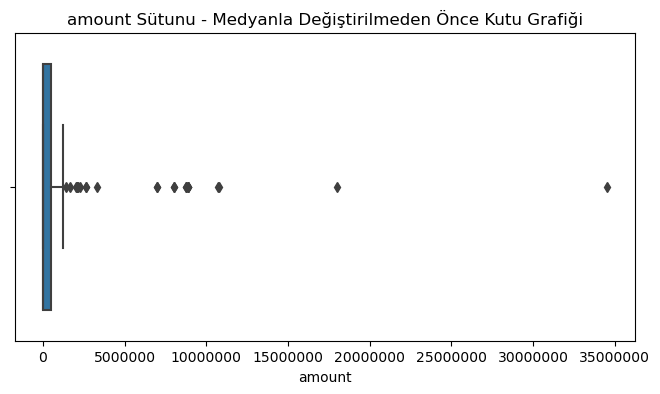

S√ºtun: document_number
Aykƒ±rƒ± deƒüer indeksleri (√úst): []
Aykƒ±rƒ± deƒüer indeksleri (Alt): []


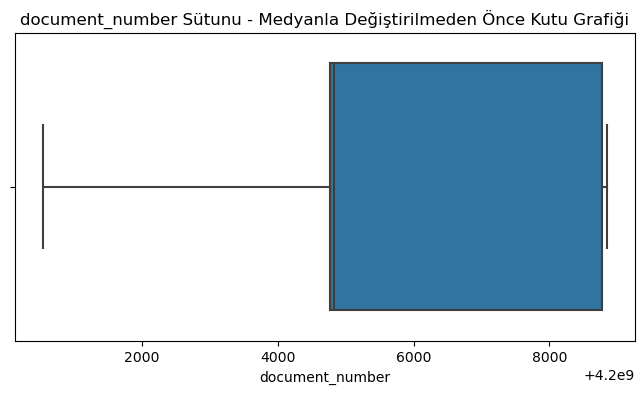

In [767]:
# IQR y√∂ntemi ile aykƒ±rƒ± deƒüer tespiti ve i≈ülenmesi
for column in outlier_columns_list:
    Q1 = np.percentile(df.loc[:, column], 25)  # 1. √áeyreklik
    Q3 = np.percentile(df.loc[:, column], 75)  # 3. √áeyreklik
    IQR = Q3 - Q1  # √áeyrekler arasƒ± geni≈ülik
    
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    upper = np.where(df.loc[:,column] >= upper_bound)[0] # √ºst sƒ±nƒ±r
    lower = np.where(df.loc[:,column] <= lower_bound)[0] # alt sƒ±nƒ±r

    print(f"S√ºtun: {column}")
    print(f"Aykƒ±rƒ± deƒüer indeksleri (√úst): {upper}")
    print(f"Aykƒ±rƒ± deƒüer indeksleri (Alt): {lower}")

    # Kutu grafiƒüi (medyanla deƒüi≈ütirilmeden √∂nce)
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f"{column} S√ºtunu - Medyanla Deƒüi≈ütirilmeden √ñnce Kutu Grafiƒüi")
    plt.ticklabel_format(style='plain', axis='x') 
    plt.show()

    # Aykƒ±rƒ± deƒüerleri s√ºtunun medyanƒ± ile deƒüi≈ütir
    median = df.loc[:, column].median()
    df.loc[upper, column] = median
    df.loc[lower, column] = median

In [768]:
df.head(50)
# 6. sƒ±radaki amount deƒüerine bakacak olursak en ba≈ülardaki g√∂r√ºnt√ºlediƒüimiz tablodaki deƒüerden daha farklƒ± bir deƒüere,
# yani o s√ºtunun medyan deƒüerine sahip olduƒüunu g√∂rebiliriz. 

company_code  document_number  \
0           1504       4200004825   
1           1504       4200004824   
2           1504       4200004826   
3           1504       4200004828   
4           1504       4200004827   
5           1504       4200004830   
6           1504       4200004829   
7           1504       4200004823   
8           1504       4200004831   
9           1504       4200004782   
10          1504       4200004783   
11          1504       4200004784   
12          1504       4200004792   
13          1504       4200004794   
14          1504       4200004795   
15          1504       4200004820   
16          1504       4200004781   
17          1504       4200004819   
18          1504       4200004786   
19          1504       4200004791   
20          1504       4200004793   
21          1504       4200004818   
22          1504       4200004796   
23          1504       4200004797   
24          1504       4200004798   
25          1504       4200004799   
26          1504       4200004800   
27          1504       4200004810   
28          1504       4200004811   
29          1504       4200004812   
30          1504       4200004813   
31          1504       4200004814   
32          1504       4200004815   
33          1504       4200004816   
34          1504       4200004821   
35          1504       4200004822   
36          1504       4200004785   
37          1504       4200004787   
38          1504       4200004788   
39          1504       4200004789   
40          1504       4200004790   
41          1504       4200004817   
42          1501       4200000908   
43          1000       4200008809   
44          1000       4200008813   
45          1000       4200008817   
46          1000       4200008840   
47          1000       4200008841   
48          1000       4200008818   
49          1000       4200008777   

                                          description  payment_type  \
0   EF7789421YORUMAJANSPAZARLAMAITHALATVET-FATURAB...             0   
1                         SEBNEMBATI-GUROLBATIODAKEGI             0   
2                            ANADOLUISLETMELERITI-KEN             0   
3                   FUARCILIKLTD.STI.-FUARCILIKODEMET             0   
4   INT-HVL-BA≈ûAK≈ûEHƒ∞RCHODEME-KARSILIKSIZ-MEDYA9IL...             0   
5          CEPSUBE-HVL-SEAKTOPRAPORODEMESI-SELINKILIC             0   
6   016716297369ISTANBULAIFAHOLDINGANONIMSIRKETITC...             1   
7               THEHESABAHAVALEKOMISYONU-KOMTCKN:VKN:             1   
8               10/09/2024CEKTAHSILATIUCRETITCKN:VKN:             1   
9                   4310NOVARALASYONVELLIK-OBA2024000             0   
10                    84229NOVARMESTCERV-OBA202400000             0   
11                        260NOVAZERHIZM.TI-OBA202400             0   
12                           54OZDILEK.SAN-OZDILEKAVM             0   
13                    7AYYAPIEND.VETIC.A.S.-TCKN:VKN:             0   
14             17YUNLUSAN.VETIC.A.S.-TEDARIKODEMETCKN             0   
15                     MEDYAPLANLAMAREKLAMORGANIZASY-             0   
16                                  65-NOVARTI-OBA202             0   
17                        9520-ATARSAGLIKHIZMETLERITI             0   
18               AIFA2AIFAHOLDINGANONIMSIRKETITCKN:VK             0   
19               AIFA2AIFAHOLDINGANONIMSIRKETITCKN:VK             0   
20    INT-HVL-CARIHESABAMAHSUBEN-REKLAMTANITIMTTCKN:V             0   
21                        TICARIODEMEMOBILTEMIZLIKACI             0   
22                        0ISTANBULATIKEOZSAHINTCKN::             1   
23                        7ISTANBULAYKUTSAHINTCKN::79             1   
24                       62ISTANBULAYSENURCIHANTCKN::             1   
25                        0ISTANBULBURCUCANBAZTCKN::9             1   
26                         ISTANBULFATIHARSLANTCKN::8             1   
27                         ISTANBULSELCUKYAPTCKN::937             1   
28                      9ISTANBULSELINKILICAKTOPTCKN: 

### Korelasyon Analizi

Korelasyon analizi, iki veya daha fazla deƒüi≈üken arasƒ±ndaki doƒürusal ili≈ükinin y√∂n√ºn√º ve derecesini √∂l√ßmek i√ßin kullanƒ±lan bir istatistiksel tekniktir. Yani iki deƒüi≈ükenin birlikte nasƒ±l deƒüi≈ütiƒüini anlamamƒ±zƒ± saƒülar. Korelasyon deƒüeri -1 ile 1 arasƒ±nda deƒüi≈ümektedir. Negatif korelasyon √∂znitelikler (features) arasƒ±nda ters orantƒ± olduƒüunu ifade ederken pozitif korelasyon doƒüru orantƒ± olduƒüunu ifade etmektedir. Korelasyonun g√ºc√º ise sayƒ±nƒ±n b√ºy√ºkl√ºƒü√º ile ilgilidir. Peki korelasyonun g√ºc√º nedir? Korelasyonun g√ºc√º ya da kuvveti, aralarƒ±ndaki ili≈üinin ne kadar g√º√ßl√º olduƒüunu ifade etmektedir. ƒ∞ki √∂znitelik arasƒ±ndaki korelasyonun deƒüeri 1 ise bu iki deƒüi≈ükeninde aynƒ± yapƒ±ya ait olduƒüunu ve biri arttƒ±ƒüƒ± zaman aynƒ± diƒüerinin de √ßok benzer ≈üekilde arttƒ±ƒüƒ±nƒ± ifade etmektedir. Bu √∂rneƒüin benzerini -1 korelasyon sonucunda da d√º≈ü√ºnebiliriz, bu sefer ise iki √∂znitelik arasƒ±nda ters orantƒ±lƒ± olacak ≈üekilde √ßok g√º√ßl√º bir ili≈üki vardƒ±r. 0 korelasyon ise ili≈üki olmadƒ±ƒüƒ±nƒ± belirtmektedir. Farklƒ± korelasyon t√ºrleri olsa da en sƒ±k kullanƒ±lan **Pearson Korelasyonu** olarak bilinmektedir. Pearson korelasyonu, deƒüi≈ükenlerin s√ºrekli yani sayƒ±sal olduƒüu durumlarda kullanƒ±lmaktadƒ±r.

In [771]:
# pearson korelasyon t√ºm n√ºmerik s√ºtunlarda kullanmak i√ßin veri setimizdeki n√ºmerik s√ºtunlarƒ± alƒ±yoruz
df_corr_list= ["company_code","document_number","payment_type","amount","transaction_type","output"]
correlation_matrix = df[df_corr_list].corr()

In [772]:
correlation_matrix

company_code  document_number  payment_type    amount  \
company_code          1.000000        -0.801570     -0.402363 -0.011533   
document_number      -0.801570         1.000000      0.341772  0.051318   
payment_type         -0.402363         0.341772      1.000000 -0.075665   
amount               -0.011533         0.051318     -0.075665  1.000000   
transaction_type     -0.007045         0.030022      0.229712  0.056061   
output                0.455029        -0.453427     -0.349164  0.078959   

                  transaction_type    output  
company_code             -0.007045  0.455029  
document_number           0.030022 -0.453427  
payment_type              0.229712 -0.349164  
amount                    0.056061  0.078959  
transaction_type          1.000000  0.327281  
output                    0.327281  1.000000

Burada company_code ifadesinin √ßƒ±ktƒ±mƒ±zla g√º√ßl√º sayƒ±labilecek bir doƒüru orantƒ±sƒ± olduƒüunu g√∂r√ºyoruz. document_number s√ºtunu da aynƒ± ≈üekilde gibi duruyor fakat bu sonu√ß rastgele √ßƒ±kmƒ±≈ü olabilir (document_number ile ilgili √ºst markdownlarda s√∂ylediklerimden √∂t√ºr√º). Bunlar haricinde payment_type ve company_code arasƒ±nda g√º√ßl√º sayƒ±labilecek bir ters orantƒ± mevcut. Dolayƒ±sƒ±yla bu iki √∂znitelik √ßƒ±ktƒ±mƒ±zƒ± da etkileyen √∂nemli bir diƒüer unsur oldu.

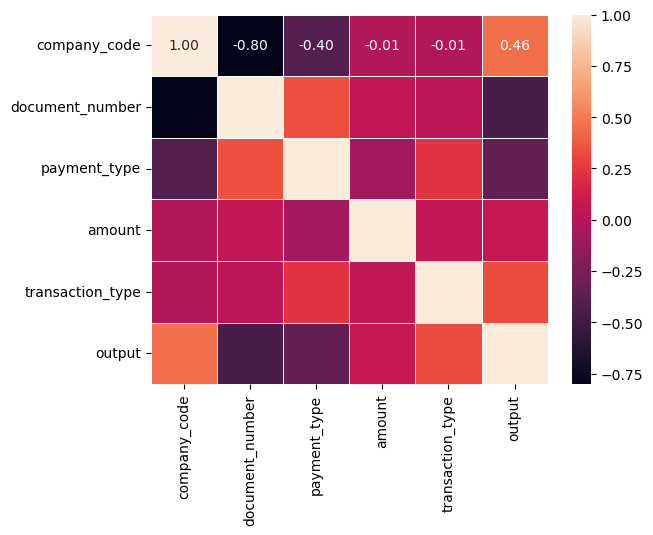

In [774]:
# heatmap ile g√∂rselle≈ütirelim
sns.heatmap(correlation_matrix, annot = True, fmt=".2f", linewidths=.7)
plt.show()

### Veri Setimizi "X" ve "y" Olarak Ayƒ±rma

**X:** girdilerimizi olu≈üturacaƒüƒ±mƒ±z deƒüi≈üken. Girdiler arasƒ±nda anlamlƒ± bir ifade olmadƒ±ƒüƒ± i√ßin **document_number ve description** s√ºtunlarƒ±nƒ± almadƒ±m. T√ºm hepsi aynƒ± deƒüer olduƒüu i√ßin √ßƒ±ktƒ±mƒ±za bir etkisi olmayacak olan **currency_code** s√ºtununu da dahil etmedim. Son olarak **seller_number, customer_number, main_account** s√ºtunlarƒ±nƒ± √ßƒ±ktƒ± sƒ±nƒ±flarƒ±mƒ±z olduƒüu i√ßin almadƒ±m ve bunlar yerine daha pratik ve kullanƒ±≈ülƒ± bir ≈üekilde olu≈üturduƒüumuz **output** s√ºtununu da **dahil etmedim.**

**y:** √ßƒ±ktƒ± sƒ±nƒ±fƒ±mƒ±zƒ± olu≈üturacaƒüƒ±mƒ±z deƒüi≈üken. **0: seller_number, 1: customer_number, 2: main_account** olarak temsil edilmektedir.

In [777]:
X = df[["company_code","payment_type","amount","transaction_type"]]

In [778]:
X.head()

company_code  payment_type    amount  transaction_type
0          1504             0  400000.0                 0
1          1504             0   21000.0                 1
2          1504             0   72000.0                 1
3          1504             0   24000.0                 1
4          1504             0  158000.0                 2

In [779]:
y = df[["output"]]

In [780]:
y.head()

output
0       1
1       1
2       1
3       1
4       1

### Verilerin √ñl√ßeklenmesi (Standardizasyon)

Verilerin standardizasyonu, farklƒ± √∂l√ßekteki veri √∂zelliklerini (feature) aynƒ± √∂l√ßeƒüe getirmek i√ßin kullanƒ±lan bir y√∂ntemdir ve verilerin ortalamasƒ±nƒ± 0, standart sapmasƒ±nƒ± ise 1 olacak ≈üekilde yeniden √∂l√ßeklendirir. Bu dengeleme ML algoritmamƒ±zƒ±n √∂ƒürenme s√ºrecini kolayla≈ütƒ±rƒ±r ve daha verimli bir eƒüitim s√ºreci saƒülar. Peki normalize edilmezse neler olur? Eƒüer bu veriler normalize edilmezse, b√ºy√ºk √∂l√ßekli deƒüerler (√∂rneƒüin gelir) model √ºzerinde daha b√ºy√ºk bir aƒüƒ±rlƒ±ƒüa sahip olur ve modelin √∂ƒürenme s√ºrecinde dengesizliklere neden olarak bozabilir. √ñl√ßekleme i≈üleminde n√ºmerik veriler √ºzerinde bir √∂l√ßekleme yapƒ±ldƒ±ƒüƒ±nƒ± yani kategorik veriler √ºzerinde bir i≈ülem yapƒ±lmadƒ±ƒüƒ±nƒ± da belirtelim.

In [783]:
scaler = StandardScaler()
scaler

StandardScaler()

In [784]:
X["amount"] = scaler.fit_transform(X[["amount"]])

In [785]:
X.head()

company_code  payment_type    amount  transaction_type
0          1504             0  0.791053                 0
1          1504             0 -0.479718                 1
2          1504             0 -0.308717                 1
3          1504             0 -0.469659                 1
4          1504             0 -0.020363                 2

## 2-) Model Geli≈ütirilmesi

ƒ∞lk b√∂l√ºmde analizlerimizi ve √∂n i≈üleme adƒ±mlarƒ±nƒ± tamamladƒ±ktan sonra sƒ±ra model geli≈ütirilmesi, train ve test s√ºre√ßlerine geldi. Bu a≈üamada bir√ßok ML √ßalƒ±≈ümasƒ±nda kullanƒ±lan ve ba≈üarƒ±lƒ± sonu√ßlar veren **Logistik Regression** algoritmasƒ±nƒ± kullanacaƒüƒ±z ve train veri setimiz ile eƒüiteceƒüiz. Geli≈ütirdiƒüimiz modelin performansƒ±nƒ± test veri seti ile farklƒ± performans √∂l√ß√ºtleri kullanarak analiz edeceƒüiz ve √ßalƒ±≈ümamƒ±zƒ± noktalayacaƒüƒ±z. 

### Eƒüitim Test Veri Seti Ayrƒ±mƒ±

In [789]:
# case √ßalƒ±≈ümasƒ± i√ßin dok√ºmanda belirtildiƒüi gibi 150, 50 ≈üeklinde train ve test ayrƒ±mƒ±nƒ± ger√ßekle≈ütiriyoruz. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 3)

In [790]:
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (150, 4)
X_test: (50, 4)
y_train: (150, 1)
y_test: (50, 1)


### Lojistik Regresyon ile Sƒ±nƒ±flandƒ±rma

In [800]:
logreg = LogisticRegression()
logreg

LogisticRegression()

In [802]:
logreg.fit(X_train,y_train) # eƒüitimi .fit mod√ºl√º ile ger√ßekle≈ütiriyoruz.

LogisticRegression()

In [810]:
y_pred_prob = logreg.predict_proba(X_test) # .predict_proba ile test veri setindeki her durum i√ßin probabilistik olarak olasƒ±lƒ±klarƒ± hesaplƒ±yoruz

.predict_proba ile, test veri setinde (X_test) her bir satƒ±rdaki deƒüerler hesaplanƒ±yor ve bu hesaplar sonucu elde edilen tahminler probabilistik olarak okunuyor. Burada dikkat etmemiz gerken nokta, 0-1-2 olmak √ºzere √º√ß adet √ßƒ±ktƒ± sƒ±nƒ±fƒ±mƒ±z olduƒüundan √∂t√ºr√º her sƒ±nƒ±f i√ßin ayrƒ± bir olasƒ±lƒ±k hesaplannmasƒ± ve bu hesaplanan tahminlerin toplamƒ±nƒ±n 1'e e≈üit olmasƒ±. y_pred_proba deƒüi≈ükenimizi yazdƒ±rdƒ±ƒüƒ±mƒ±z zaman bunu net bir ≈üekilde g√∂rebiliyoruz. Peki bu √º√ß deƒüer arasƒ±ndan hangisi bizim tahmin edilen sƒ±nƒ±fƒ±mƒ±z olacak? Bu √º√ß tahmin deƒüerinden en y√ºksek olanƒ± bizim i√ßin tahmin edilen sƒ±nƒ±f olarak se√ßilmi≈ü anlamƒ±na gelmektedir. ƒ∞lk tahmin deƒüerleri i√ßin √∂rnek verecek olursak 0: 0.26727397, 1: 0.02708017, 2: 0.70564586 ≈üeklindedir. Yani eƒüittiƒüimiz logreg modeli X_test veri setimizin ilk satƒ±rƒ±ndaki deƒüerleri hesaplamƒ±≈ü ve tahminin bu y√∂nde olmu≈ütur.

y_pred_prob

In [821]:
y_pred=np.argmax(y_pred_prob, axis=1) # tahminlerimizde en y√ºksek olasƒ±lƒ±ƒüa sahip olan indis (0,1,2) se√ßiliyor. 
y_pred

array([2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2, 0, 1, 0, 0, 1, 2, 0, 2, 1,
       0, 0, 0, 0, 0, 0], dtype=int64)

### Performans √ñl√ß√ºtleri

**Accuracy**

Accuracy score, bir sƒ±nƒ±flandƒ±rma modelinin doƒüruluƒüunu √∂l√ßmek i√ßin kullanƒ±lan temel bir performans metriƒüidir ve modelin doƒüru tahmin ettiƒüi veri noktalarƒ±nƒ±n toplam veri noktalarƒ±na oranƒ±nƒ± ifade eder. Form√ºl√º **ùê¥ ùëê ùëê ùë¢ ùëü ùëé ùëê ùë¶ = ùê∑ ùëú ùëî ùëü ùë¢  ùëá ùëé ‚Ñé ùëö ùëñ ùëõ ùëô ùëí ùëü / ùëá ùëú ùëù ùëô ùëé ùëö  ùëâ ùëí ùëü ùëñ  ùëÅ ùëú ùëò ùë° ùëé ùëô ùëé ùëü ƒ±** ≈üeklindedir. Deƒüeri 0 ile 1 arasƒ±nda deƒüi≈üir ve 1 m√ºkemmel bir performansƒ± temsil eder. Veri setindeki sƒ±nƒ±flar dengeli olduƒüunda genellikle iyi bir performans g√∂stergesidir. Ancak, sƒ±nƒ±flarƒ±n dengesiz olduƒüu durumlarda yanƒ±ltƒ±cƒ± olabilir, √ß√ºnk√º model √ßoƒüunluk sƒ±nƒ±fƒ±nƒ± s√ºrekli tahmin ederek y√ºksek doƒüruluk elde edebilir. Bu nedenle, dengesiz veri setlerinde precision, recall, F1-score gibi diƒüer metriklerle birlikte deƒüerlendirilmesi daha doƒüru bir sonu√ß verir.

In [824]:
accuracy = accuracy_score(y_pred,y_test) # Tahmin ettiƒüimiz deƒüerler ile test i√ßin hazƒ±rladƒ±ƒüƒ±mƒ±z veri setinin kar≈üƒ±la≈ütƒ±rƒ±lmasƒ± sonucunda ortaya √ßƒ±kan deƒüerimize bakalƒ±m
print(f"Test Veri Setindeki Doƒüruluk Oranƒ±mƒ±z (Test Accuracy): {accuracy}")

Test Veri Setindeki Doƒüruluk Oranƒ±mƒ±z (Test Accuracy): 0.88


**Confusion Matrix**

Confusion Matrix, makine √∂ƒürenmesi modellerinin sƒ±nƒ±flandƒ±rma performansƒ±nƒ± deƒüerlendirmek i√ßin kullanƒ±lan bir tablodur ve ger√ßek deƒüerler ile modelin tahmin ettiƒüi deƒüerler arasƒ±ndaki ili≈ükiyi g√∂sterir. Matris, d√∂rt temel bile≈üenden olu≈üur: **True Positives (TP), doƒüru tahmin edilen pozitifler; True Negatives (TN), doƒüru tahmin edilen negatifler; False Positives (FP), yanlƒ±≈ü pozitif tahminler; ve False Negatives (FN), yanlƒ±≈ü negatif tahminler.** Satƒ±rlar ger√ßek sƒ±nƒ±flarƒ±, s√ºtunlar ise modelin tahmin ettiƒüi sƒ±nƒ±flarƒ± temsil eder.

F1-Score (Weighted): 0.8662068965517241
Confusion Matrix:
[[26  0  0]
 [ 0 12  0]
 [ 6  0  6]]


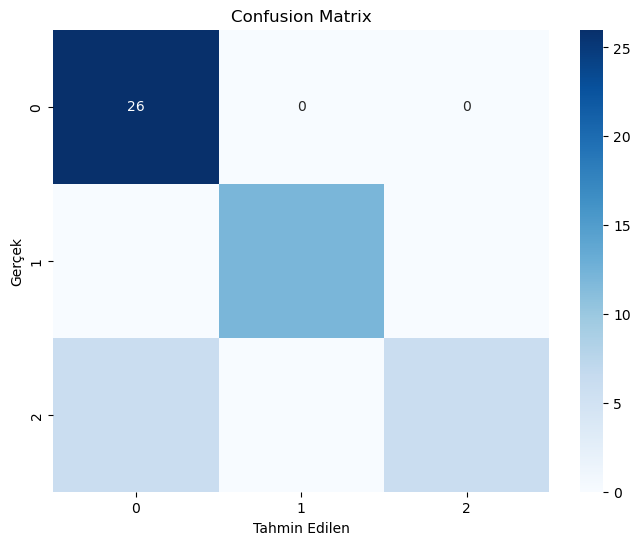

In [833]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Confusion Matrix'i g√∂rselle≈ütirelim
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Ger√ßek')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix ile modelimizin hangi sƒ±nƒ±flarda iyi ya da k√∂t√º bir performans g√∂sterdiƒüini net ≈üekilde g√∂rebiliyoruz. Yukarƒ±daki matriksi inceleyecek olursak, 0 (seller_number) ve 1 (customer_number) sƒ±nƒ±flarƒ± i√ßin hatasƒ±z bir tahmin yeteneƒüimiz varken 2 (main_account) sƒ±nƒ±fƒ±nda %50 bir ba≈üarƒ± oranƒ±mƒ±z var.

**F1-Score**

1-score, makine √∂ƒürenmesinde bir modelin doƒüruluƒüunu ve duyarlƒ±lƒ±ƒüƒ±nƒ± dengeleyen, √∂zellikle dengesiz veri setlerinde faydalƒ± olan bir performans √∂l√ß√ºt√ºd√ºr. Precision (kesinlik) ve Recall (duyarlƒ±lƒ±k) deƒüerlerinin harmonik ortalamasƒ± olarak hesaplanƒ±r birden fazla metriƒüi i√ßeren bir yapƒ±sƒ± olduƒüundan klasik accuracy hesabƒ±ndan daha g√ºvenilirdir ve ≈üu form√ºlle ifade edilir: **ùêπ 1 = 2 ‚ãÖ ùëÉ ùëü ùëí ùëê ùëñ ùë† ùëñ ùëú ùëõ ‚ãÖ ùëÖ ùëí ùëê ùëé ùëô ùëô/ùëÉ ùëü ùëí ùëê ùëñ ùë† ùëñ ùëú ùëõ + ùëÖ ùëí ùëê ùëé ùëô ùëô**

In [840]:
# F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score (Weighted): {f1}")

F1-Score (Weighted): 0.8662068965517241
